In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from evaluation import get_cm_sklearn, print_metrics
from preprocessing import TrainingPreProcessor

RANDOM_STATE = 0

train_set = pd.read_csv("input/train.csv")

training_preprocessor = TrainingPreProcessor()
training_preprocessor.fit(train_set, ignore_columns=["CLIENTNUM"])

X, y = training_preprocessor.transform(train_set)
class_weight = training_preprocessor.class_weight

### Definição e treinamento do modelo regressão logística

In [3]:
rf_model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight=class_weight)

In [4]:
kfold = StratifiedKFold(5, shuffle=True, random_state=RANDOM_STATE)
parameters = {
    "n_estimators": [50, 100, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 7, None],
    "max_features": ["sqrt", "log2"]
}

In [5]:
grid_search = GridSearchCV(
    rf_model,
    parameters,
    scoring="balanced_accuracy",
    cv=kfold,
    verbose=3,
    n_jobs=-1,
)

In [6]:
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
0.9125327647025576


RandomForestClassifier(class_weight={0: 3.1157692307692306,
                                     1: 0.5955741802676077},
                       criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=0)

In [7]:
best_model = grid_search.best_estimator_

In [8]:
best_model.fit(X, y)

RandomForestClassifier(class_weight={0: 3.1157692307692306,
                                     1: 0.5955741802676077},
                       criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=0)

In [9]:
test_set = pd.read_csv("input/test.csv")
X_test, y_test = training_preprocessor.transform(test_set)

### Avaliação do modelo regressão logística

Accuracy: 0.9294175715695953
Balanced Accuracy: 0.91346501719846
F1: 0.9570183348361887
RoC AuC: 0.91346501719846


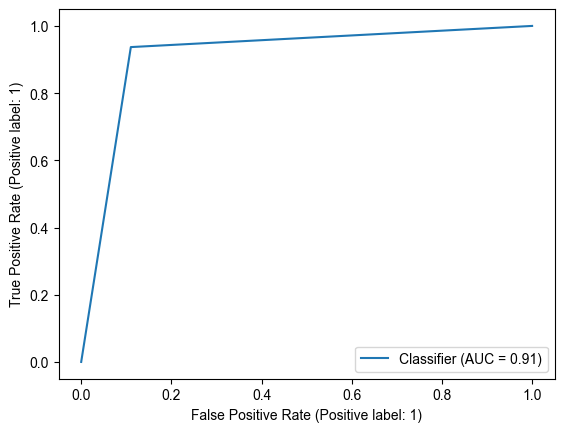

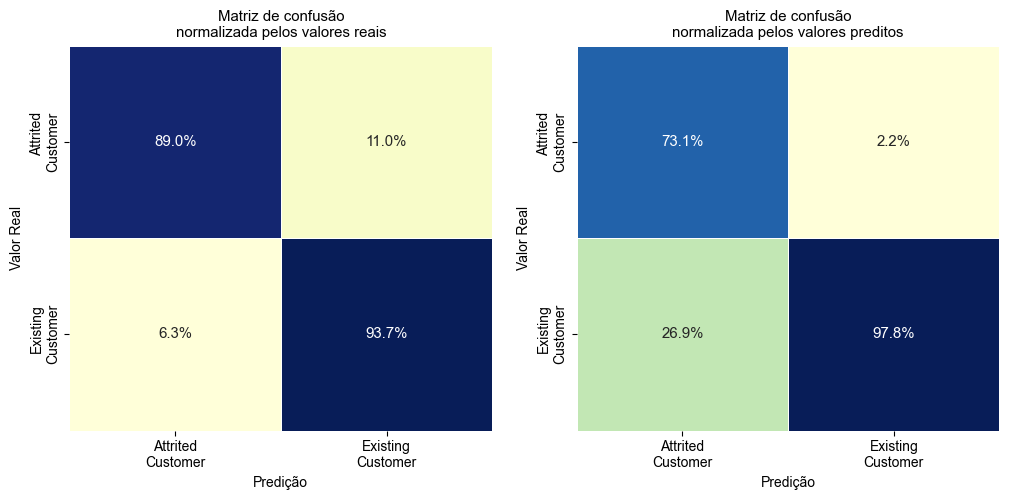

In [10]:
# Avaliação do modelo de Regressão Logística
y_pred_test = best_model.predict(X_test)

print_metrics(y_test, y_pred_test)

get_cm_sklearn(
    y_test,
    y_pred_test,
    labels=[
        "\n".join(label.split())
        for label in training_preprocessor.label_encoder.classes_
    ],
)